# Chapter 1: Introduction

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

## Essential Libraries and Tools

### NumPy

In [34]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


### SciPy

In [35]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else (aka an identity matrix).
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

NumPy array:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [36]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format.  
# The CSR format stores a sparse m × n matrix M in row form using three (one-dimensional) arrays (A, IA, JA).  
# Only the nonzero entries are stored.  
# http://www.scipy-lectures.org/advanced/scipy_sparse/csr_matrix.html  
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Usually it isn't possible to create dense representations of sparse data (they won't fit in memory), so we need to create sparse representations directly.  
Here is a way to create the same sparse matrix as before using the [COO format](http://www.scipy-lectures.org/advanced/scipy_sparse/coo_matrix.html):

In [37]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


More details on SciPy sparse matrices can be found in the [SciPy Lecture Notes](http://www.scipy-lectures.org/).

### matplotlib

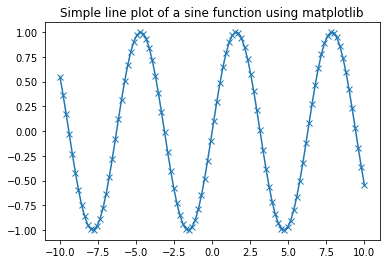

In [38]:
# %matplotlib inline -- the default, just displays the plot in the browser.
# %matplotlib notebook -- provides an interactive environment for the plot.
import matplotlib.pyplot as plt

# Generate a sequnce of numbers from -10 to 10 with 100 steps (points) in between.
x = np.linspace(-10, 10, 100)
# Create a second array using sine.
y = np.sin(x)
# The plot function makes a line chart of one array against another.
plt.plot(x, y, marker="x")
plt.title("Simple line plot of a sine function using matplotlib")
plt.show()

### pandas

Here is a small example of creating a pandas DataFrame using a Python dictionary.

In [39]:
import pandas as pd
from IPython.display import display

# Create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows for "pretty printing" of dataframes in the Jupyter notebooks.
display(data_pandas)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


There are several possible ways to query this table.  
Here is one example:

In [40]:
# Select all rows that have an age column greater than 30:
display(data_pandas[data_pandas.Age > 30])

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


### mglearn

The `mglearn` package is a library of utility functions written specifically for this book, so that the code listings don't become too cluttered with details of plotting and data loading.  
The `mglearn` library can be found at the [author's Github repository](https://github.com/amueller/introduction_to_ml_with_python/tree/master/mglearn), and can be installed with the command `pip install mglearn`.

### *Note*  
All of the code in this book will assume the following imports:  

```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
```

We also assume that you will run the code in a Jupyter Notebook with the %matplotlib notebook or %matplotlib inline magic enabled to show plots.  
If you are not using the notebook or these magic commands, you will have to call plt.show to actually show any of the figures.

In [41]:
# Make sure your dependencies are similar to the ones in the book.

import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.6.1 (default, Jun 29 2017, 11:01:42) 
[GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.42)]
pandas version: 0.20.3
matplotlib version: 2.0.2
NumPy version: 1.13.1
SciPy version: 0.19.1
IPython version: 6.1.0
scikit-learn version: 0.18.2


## A First Application: Classifying Iris Species

### Meet the Data

The data we will use for this example is the Iris dataset, which is a commonly used dataset in machine learning and statistics tutorials.  
The Iris dataset is included in `scikit-learn` in the `datasets` module.  
We can load it by calling the `load_iris` function.

In [42]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

The `iris` object that is returned by `load_iris` is a `Bunch` object, which is very similar to a dictionary.  
It contains keys and values:

In [43]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


The value of the key DESCR is a short description of the dataset.

In [44]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


The value of the key `target_names` is an array of strings, containing the species of flower that we want to predict.

In [45]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


The value of `feature_names` is a list of strings, giving the description of each feature:

In [46]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the `target` and `data` fields.  
`data` contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:

In [47]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


The rows in the `data` array correspond to flowers, while the columns represent the four measurements that were taken for each flower.

In [48]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


The shape of the `data` array is the number of samples (flowers) multiplied by the number of features (properties, e.g. sepal width).  
Here are the feature values for the first five samples:

In [49]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


The data tells us that all of the first five flowers have a petal width of 0.2 cm and that the first flower has the longest sepal (5.1 cm)

The `target` array contains the species of each of the flowers that were measured, also as a NumPy array:

In [50]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


`target` is a one-dimensional array, with one entry per flower:

In [51]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


The species are encoded as integers from 0 to 2:

In [52]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meanings of the numbers are given by the `iris['target_names']` array:  
0 means *setosa*, 1 means *versicolor*, and 2 means *virginica*.

### Measuring Success: Training and Testing Data

We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements.  
To assess the model's performance, we show it new data for which we have labels.  
This is usually done by splitting the labeled data into *training data* and *test data*.  
[`scikit-learn` contains a function called `train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) that shuffles the data and splits it for you (the default is 75% train and 25% test).  
In `scikit-learn`, data is usually denoted with a capital `X`, while labels are denoted by a lowercase `y`.  
This is inspired by the standard formulation `f(x)=y` in mathematics, where `x` is the input to a function and `y` is the output.  
Following more conventions from mathematics, we use a capital `X` because the data is a two-dimensional array (a matrix) and a lowercase `y` because the target is a one-dimensional array (a vector).

Let's call `train_test_split` on our data and assign the outputs using this nomenclature:

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
# The random_state parameter gives the pseudorandom number generator a fixed (set) seed.
# Setting the seed allows us to obtain reproducible results from randomized procedures.

print("X_train: \n{}".format(X_train))
print("X_test: \n{}".format(X_test))
print("y_train: \n{}".format(y_train))
print("y_test: \n{}".format(y_test))

X_train: 
[[ 5.9  3.   4.2  1.5]
 [ 5.8  2.6  4.   1.2]
 [ 6.8  3.   5.5  2.1]
 [ 4.7  3.2  1.3  0.2]
 [ 6.9  3.1  5.1  2.3]
 [ 5.   3.5  1.6  0.6]
 [ 5.4  3.7  1.5  0.2]
 [ 5.   2.   3.5  1. ]
 [ 6.5  3.   5.5  1.8]
 [ 6.7  3.3  5.7  2.5]
 [ 6.   2.2  5.   1.5]
 [ 6.7  2.5  5.8  1.8]
 [ 5.6  2.5  3.9  1.1]
 [ 7.7  3.   6.1  2.3]
 [ 6.3  3.3  4.7  1.6]
 [ 5.5  2.4  3.8  1.1]
 [ 6.3  2.7  4.9  1.8]
 [ 6.3  2.8  5.1  1.5]
 [ 4.9  2.5  4.5  1.7]
 [ 6.3  2.5  5.   1.9]
 [ 7.   3.2  4.7  1.4]
 [ 6.5  3.   5.2  2. ]
 [ 6.   3.4  4.5  1.6]
 [ 4.8  3.1  1.6  0.2]
 [ 5.8  2.7  5.1  1.9]
 [ 5.6  2.7  4.2  1.3]
 [ 5.6  2.9  3.6  1.3]
 [ 5.5  2.5  4.   1.3]
 [ 6.1  3.   4.6  1.4]
 [ 7.2  3.2  6.   1.8]
 [ 5.3  3.7  1.5  0.2]
 [ 4.3  3.   1.1  0.1]
 [ 6.4  2.7  5.3  1.9]
 [ 5.7  3.   4.2  1.2]
 [ 5.4  3.4  1.7  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 6.9  3.1  4.9  1.5]
 [ 4.6  3.1  1.5  0.2]
 [ 5.9  3.   5.1  1.8]
 [ 5.1  2.5  3.   1.1]
 [ 4.6  3.4  1.4  0.3]
 [ 6.2  2.2  4.5  1.5]
 [ 7.2  3.6  6.1  2.5]
 

The output of the `train_test_split` function is `X_train, X_test, y_train,` and `y_test`, which are all NumPy arrays.  
`X_train` contains 75% of the rows in the dataset, and `X_test` contains the remaining 25%.

In [54]:
print("X_train shape: \n{}".format(X_train.shape))
print("y_train shape: \n{}".format(y_train.shape))

X_train shape: 
(112, 4)
y_train shape: 
(112,)


In [55]:
print("X_test shape: \n{}".format(X_test.shape))
print("y_test shape: \n{}".format(y_test.shape))

X_test shape: 
(38, 4)
y_test shape: 
(38,)


### First Things First: Look at Your Data

Before building a machine learning model, it is often a good idea to inspect the data for several reasons:  
- so you can see if the task can be solved without machine learning.
- so you can see if the desired information is contained in the data or not.
- so you can detect abnormalities or peculiarities in the data (inconsistent measurements, etc).


One of the best ways to inspect data is to visualize it.  
In the example below we will be building a type of [scatter plot](https://plot.ly/matplotlib/scatter/) known as a [pair plot](http://seaborn.pydata.org/generated/seaborn.pairplot.html).  
The data points are colored according to the species the iris belongs to.  
To create the plot, we first convert the NumPy array into a pandas DataFrame.  
[`pandas` has a function to create pair plots called `scatter_matrix`](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-scatter-matrix).  
The diagonal of this matrix is filled with histograms of each feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1106204a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110eaba20>]], dtype=object)

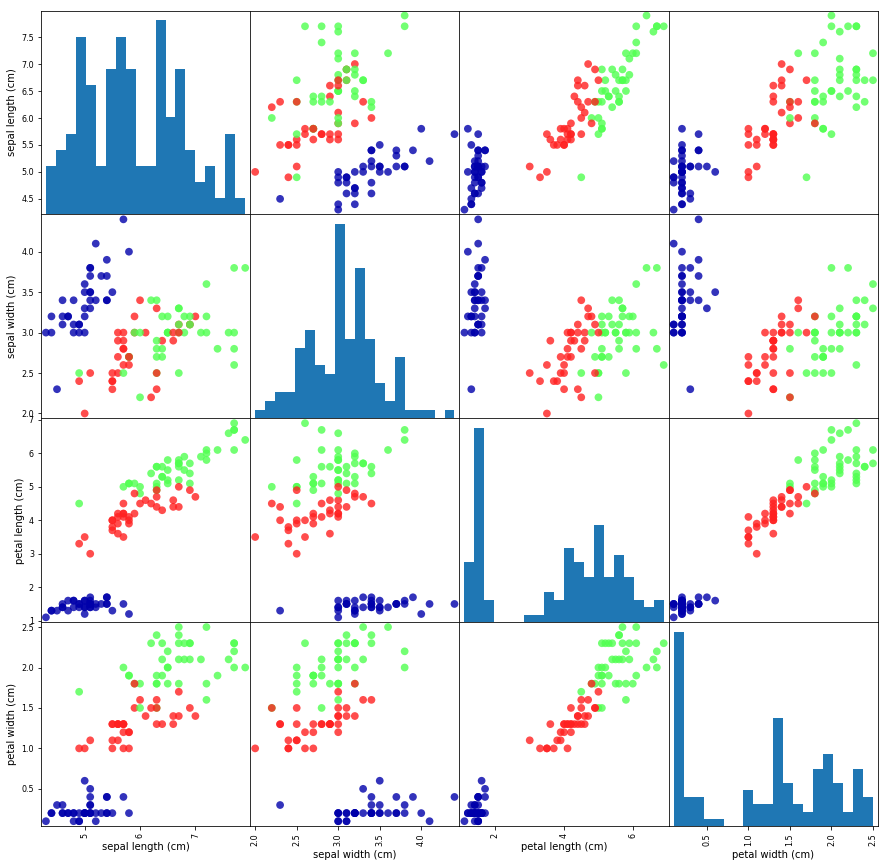

In [56]:
# Create dataframe from data in X_train.
# Label the columns using the strings in iris_dataset.feature_names.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# Create a scatter matrix from the dataframe, color by y_train.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements.  
This means that a machine learning model will likely be able to learn to separate them.

### Building Your First Model: k-Nearest Neighbors

There are many classification algorithms in `scikit-learn` that we can use; here we're going to implement the [k-nearest neighbors classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).  
The `k` in k-nearest neighbors refers to the number of nearest neighbors that will be used to predict the new data point.  
We can consider any fixed number `k` of neighbors; the default for `sklearn.neighbors.KNeighborsClassifier` is 5, we're going to keep things simple and use 1 for `k`.

All machine learning models in `scikit-learn` are implemented in their own classes, which are called `Estimator` classes.  
The `k`-nearest neighbors classification algorithm is implemented in the `KNeighborsClassifier` class in the `neighbors` module.  
More information about the Nearest Neighbors Classification [can be found here](sklearn.neighbors.KNeighborsClassifier), and an [example can be found here](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py).  
Before we can use the model, we need to instantiate the class into an object.  
This is when we will set any parameters of the model, the most important of which is the number of neighbors, which we will set to 1:

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The `knn` object encapsulates the algorithm that will be used to build the model from the training data, as well as the algorithm to make predictions on new data points.  
It will also hold the information that the algorithm has extracted from the training data.  
In the case of `KNeighborsClassifier`, it will just store the training set.  
To build the model on the training set, we call the `fit` method of the `knn` object, which takes as arguments the NumPy array `X_train` containing the training data and the NumPy array `y_train` of the corresponding training labels:

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

The `fit` method returns the `knn` object itself (and modifies it in place), so we get a string representation of our classifier.  
The representation shows us which parameters were used in creating the model. 
Nearly all of them are the default values, but you can also find `n_neighbors=1`, which is the parameter that we passed.  
Most models in `scikit-learn` have many parameters, but the majority of them are either speed optimizations or for very special use cases.  
The important parameters will be covered in Chapter 2.

### Making Predictions

Now we can make predictions using this model on new data which isn't labeled.  
Let's use an example iris with a sepal length of 5cm, sepal width of 2.9cm, petal length of 1cm, and petal width of 0.2cm.  
We can put this data into a NumPy array by calculating the shape, which is the number of samples(1) multiplied by the number of features(4):

In [59]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: \n{}".format(X_new.shape))

X_new.shape: 
(1, 4)


Note that we made the measurements of this single flower into a row in a two-dimensional NumPy array.  
`scikit-learn` *always* expects two-dimensional arrays for the data.  
Now, to make a prediction, we call the `predict` method of the `knn` object:

In [60]:
prediction = knn.predict(X_new)
print("Prediction: \n{}".format(prediction))
print("Predicted target name: \n{}".format(
        iris_dataset['target_names'][prediction]))

Prediction: 
[0]
Predicted target name: 
['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its species is `setosa`.  
How do we know whether we can trust our model?  
We don't know the correct species of this sample, which is the whole point of building the model.

### Evaluating the Model

This is where the test set that we created earlier comes into play.  
The test data wasn't used to build the model, but we do know what the correct species is for each iris in the test set.  
Therefore, thus, hence, ergo, we can make a prediction for each iris in the test data and compare it against its label (the known species).  
We can measure how well the model works by computing the [accuracy](https://projects.ncsu.edu/labwrite/Experimental%20Design/accuracyprecision.htm), which is the fraction of flowers for which the correct species was predicted:

In [61]:
y_pred = knn.predict(X_test)
print("Test set predictions: \n{}".format(y_pred))

Test set predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [62]:
print("Test set score: \n{:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 
0.97


We can also use the `score` method of the `knn` object, which will compute the test set accuracy for us:

In [63]:
print("Test set score: \n{:.2f}".format(knn.score(X_test, y_test)))

Test set score: 
0.97


For this model, the test set accuracy is about 0.97, which means that we made the correct prediction for 97% of the irises in the test set.  
In later chapters we will discuss how we can improve performance, and what caveats there are in tuning a model.

## Summary and Outlook

Here is a summary of the code needed for the whole training and evaluation procedure:

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: \n{:.2f}".format(knn.score(X_test, y_test)))

Test set score: 
0.97


This snippet contains the core code for applying any machine learning algorithm using `scikit-learn`.  
The `fit`, `predict`, and `score` methods are the common interface to supervised models in `scikit-learn`, and with the concepts introduced in this chapter, you can apply these models to many machine learning tasks.  
In the next chapter, we will go more into depth about the different kinds of supervised models in `scikit-learn` and how to apply them successfully.